In [4]:
import pandas 
import matplotlib.pyplot as plt

In [5]:
invoices_df = pandas.read_csv('/Users/joaquinbungubung/Downloads/fct_invoice.csv')
customers_df = pandas.read_json('/Users/joaquinbungubung/Downloads/dim_customer.json')

In [6]:
print(invoices_df.head())

  invoice_no  customer_id  category  quantity    price payment_method  \
0    I138884          229  Clothing         5  1500.40    Credit Card   
1    I317333         3433     Shoes         3  1800.51     Debit Card   
2    I127801          644  Clothing         1   300.08           Cash   
3    I173702         4900     Shoes         5  3000.85    Credit Card   
4    I337046         1089     Books         4    60.60           Cash   

  invoice_date   shopping_mall  
0   05/08/2022          Kanyon  
1   12/12/2021  Forum Istanbul  
2   09/11/2021       Metrocity  
3   16/05/2021    Metropol AVM  
4   24/10/2021          Kanyon  


Easy
- 

In [23]:
unique_customers = invoices_df['customer_id'].nunique()
print("# Unique customers:", unique_customers)


# Unique customers: 5191


In [21]:
unique_categories = invoices_df['category'].nunique()
categories = invoices_df['category'].unique()
print("# unique categories:", unique_categories)
print("Categories:", categories)

# unique categories: 8
Categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [22]:
popular_payment = invoices_df['payment_method'].value_counts().idxmax()
payment_count = invoices_df['payment_method'].value_counts().max()
print(f"#1 Popular Payment Method: {popular_payment}")
print(f"Number of Times Utilized: {payment_count}")

#1 Popular Payment Method: Cash
Number of Times Utilized: 44447


Medium
- 

In [24]:
popular_categories = invoices_df.groupby('category')['quantity'].sum().nlargest(3)
print("Three most pop. categories, by Σ sales:")
print(popular_categories)

Three most pop. categories, by Σ sales:
category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Name: quantity, dtype: int64


In [25]:
customers_over_45 = customers_df[customers_df['age'] > 45]
merged_df = pandas.merge(customers_over_45, invoices_df, left_on='id', right_on='customer_id')
total_purchases_over_45 = merged_df['quantity'].sum()
total_sales_over_45 = merged_df['price'].sum()
print("Total sales attributed to customers over age of 45:", total_sales_over_45)
print("Total purchases attributed to customer over age of 45:", total_purchases_over_45)

Total sales attributed to customers over age of 45: 22370553.27
Total purchases attributed to customer over age of 45: 97629


/var/folders/p8/7b0dz0qx5q17yltygl052_vh0000gn/T/ipykernel_21996/2481615135.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  invoices_df['invoice_date'] = pandas.to_datetime(invoices_df['invoice_date'])


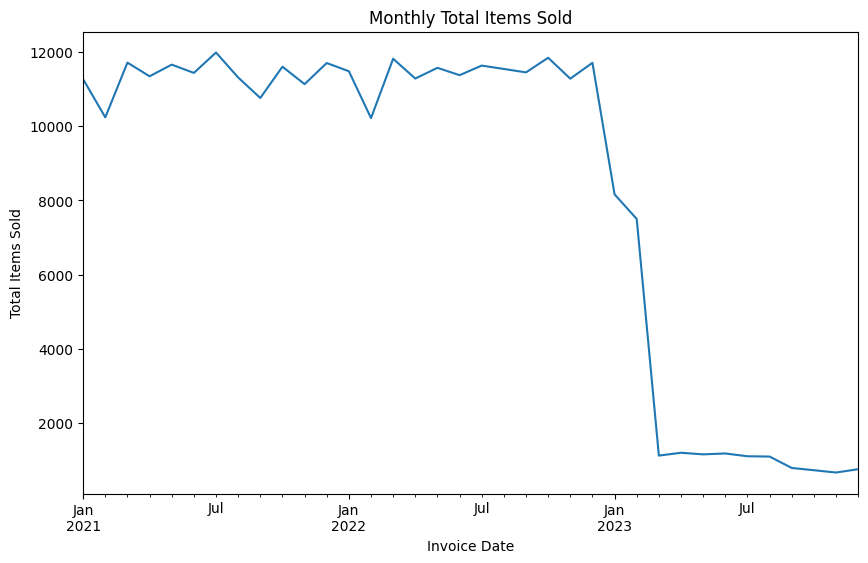

In [16]:
invoices_df['invoice_date'] = pandas.to_datetime(invoices_df['invoice_date'])
monthly_data = invoices_df.set_index('invoice_date').resample('M')['quantity'].sum()
plt.figure(figsize=(10, 6))
monthly_data.plot(kind='line')
plt.xlabel('Invoice Date')
plt.ylabel('Total Items Sold')
plt.title('Monthly Total Items Sold')
plt.show()

Hard
- 

In [19]:
customers_df['decade_age_range'] = pandas.cut(customers_df['age'], bins=range(0, 101, 10), labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])
merged_df = pandas.merge(invoices_df, customers_df, left_on='customer_id', right_on='id')
pivot_table = merged_df.pivot_table(values='quantity', index='category', columns='decade_age_range', aggfunc='sum', fill_value=0)
print(pivot_table)

decade_age_range  0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  \
category                                                                        
Books               0    351   1443   1522   1471   1438   1354   1031    409   
Clothing            0   2722   9233  10391   9996   9802   9080   7154   3401   
Cosmetics           0   1178   3999   4865   4382   4214   3990   2884   1470   
Food & Beverage     0   1067   3929   4651   4443   4106   3968   2894   1328   
Shoes               0    638   2810   3181   3035   2832   2471   2134    951   
Souvenir            0    458   1267   1487   1488   1352   1215    907    475   
Technology          0    438   1313   1607   1518   1222   1386    964    400   
Toys                0    748   2841   3259   2891   2747   2593   2179    983   

decade_age_range  90-99  
category                 
Books                 0  
Clothing              0  
Cosmetics             0  
Food & Beverage       0  
Shoes                 0  
Souveni